1. Импортируйте библиотеку pandas как pd.    
    Прочитайте датасет bookings.csv , находящийся по ссылке, с разделителем ;    
    и сохраните в переменную bookings.   
    Затем запишите первые 7 строк в переменную bookings_head.    
  

In [27]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(rc = {'figure.figsize' :(16, 6)}, style = 'whitegrid')
url = 'https://stepik.org/media/attachments/lesson/360344/bookings.csv'
bookings = pd.read_csv(url, encoding='windows-1251', sep=';')
bookings_head = (bookings.head(7))
bookings_head

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-03


2. Посмотрите на размеры таблицы. Сколько всего в ней столбцов?

In [28]:
bookings.shape[1]

21

3. К какому типу относится большинство переменных? 

    - float64
    - **int64**
    - object

In [29]:
bookings.dtypes

Hotel                         object
Is Canceled                    int64
Lead Time                      int64
arrival full date             object
Arrival Date Year              int64
Arrival Date Month            object
Arrival Date Week Number       int64
Arrival Date Day of Month      int64
Stays in Weekend nights        int64
Stays in week nights           int64
stays total nights             int64
Adults                         int64
Children                     float64
Babies                         int64
Meal                          object
Country                       object
Reserved Room Type            object
Assigned room type            object
customer type                 object
Reservation Status            object
Reservation status_date       object
dtype: object

4. Как вы уже могли заметить, при сборе датасета произошла небольшая ошибка, и названия колонок были записаны в неудобном для дальнейшей работы формате. Исправьте ситуацию, приведя названия столбцов к нижнему регистру и заменив пробелы на знак нижнего подчеркивания. Например: Is Canceled -> is_canceled

In [30]:
def replace_space_with_tab(name):
    new_name = name.replace(' ', '_')
    return new_name.lower()

bookings = bookings.rename(columns = replace_space_with_tab)
bookings.head()

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


5. Перейдем к исследованию данных! Пользователи из каких стран совершили наибольшее число успешных бронирований? 
Бронирование считается успешным, если в дальнейшем не было отменено (переменная is_canceled). В качестве ответа выберите страны, входящие в топ-5.

In [31]:
bookings.query('is_canceled ==  0')\
            .country\
            .value_counts()[:5]

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
Name: country, dtype: int64

6. На сколько ночей (stays_total_nights) 
в среднем бронируют отели типа City Hotel? Resort Hotel   
**Среднее число забронированных ночей в отелях типа city hotel: 2.98. В resort hotel: 4.32**

In [32]:

bookings.groupby('hotel', as_index=False) \
    .agg({'stays_total_nights': 'mean'})\
    .round(2)

,hotel,stays_total_nights
0,City Hotel,2.98
1,Resort Hotel,4.32


7. Иногда тип номера, полученного клиентом (assigned_room_type), отличается от изначально забронированного (reserved_room_type). Такое может произойти, например, по причине овербукинга.

Сколько подобных наблюдений встретилось в датасете?

In [33]:
bookings.query('assigned_room_type != reserved_room_type').shape[0]

14917

8. Теперь проанализируйте даты запланированного прибытия (arrival_date_year).
На какой месяц чаще всего оформляли бронь в 2016 году? Изменился ли самый популярный месяц в 2017?    
    - В 2016 чаще всего бронировали отель на октябрь
    - В 2017 чаще всего бронировали отель на октябрь
    - В 2016 чаще всего бронировали отель на май
    - В 2016 чаще всего оформляли бронирование на сентябрь

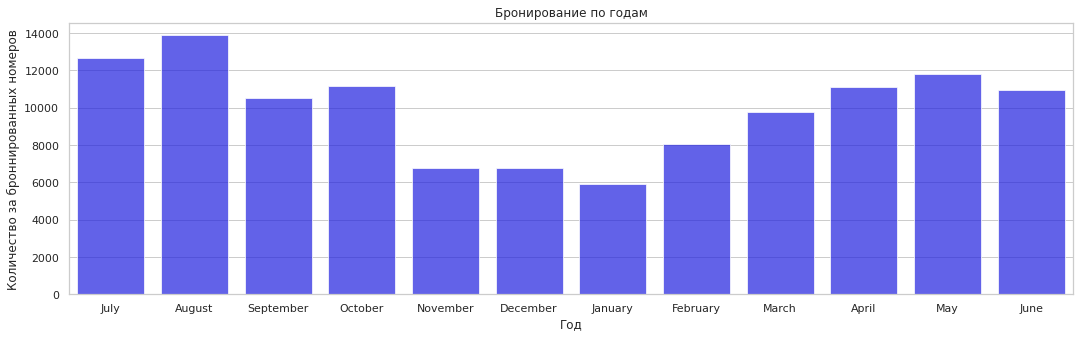

In [47]:
def draw_graph_countplot(value, name_x, name_y, title):
    plt.figure(figsize=(18, 5))
    sns.set_style('whitegrid')
    sns.countplot(value, color = 'blue',alpha = 0.7)
    plt.title(title)
    plt.xlabel(name_x)
    plt.ylabel(name_y)

title = "Бронирование по годам"
name_x = "Год"
name_y = "Количество за броннированных номеров"
draw_graph_countplot(bookings.arrival_date_month, name_x, name_y, title)

9. Сгруппируйте данные по годам, а затем проверьте, на какой месяц (arrival_date_month) бронирования отеля типа City Hotel отменялись чаще всего в 2015? 2016? 2017? 

Hint: для этого сначала примените метод groupby, после чего выберите нужную колонку для дальнейших действий :) Например:

df.groupby('column_1')['column_2'].what_to_do()

In [55]:
bookings.query('is_canceled == 1')\
    .groupby('arrival_date_year')['arrival_date_month'].value_counts()

arrival_date_year  arrival_date_month
2015               September             2094
                   October               1732
                   August                1598
                   July                  1259
                   December               973
                   November               486
2016               October               2514
                   June                  2096
                   April                 2061
                   September             2022
                   May                   1915
                   August                1825
                   November              1636
                   July                  1499
                   March                 1477
                   December              1398
                   February              1337
                   January                557
2017               May                   2762
                   April                 2463
                   June                  2

10. Посмотрите на числовые характеристики трёх колонок: adults, children и babies. Какая из них имеет наибольшее среднее значение?

In [56]:
bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,total_kids
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119386.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,3.427900,1.856403,0.103890,0.007949,0.111839
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,2.557439,0.579261,0.398561,0.097436,0.412567
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,4.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,69.000000,55.000000,10.000000,10.000000,10.000000


11. Создайте колонку total_kids, объединив столбцы children и babies. Для отелей какого типа среднее значение переменной оказалось наибольшим?
    - City hotel – отель находится в городе
    - Resort hotel – отель курортный
В качестве ответа укажите наибольшее среднее total_kids, округлив до 2 знаков после точки.

In [58]:
bookings['total_kids'] = bookings['children'] + bookings['babies']
bookings.groupby('hotel')\
    .agg({'total_kids' : 'mean'}).round(2).max()

total_kids    0.14
dtype: float64

12. 
Не все бронирования завершились успешно (is_canceled), поэтому можно посчитать, сколько клиентов было потеряно в процессе. 
Churn rate (отток, коэффициент оттока) – это процент подписчиков (например, на push-уведомления от сайта),
которые отписались от канала коммуникации, отказались от услуг сервиса в течение определенного периода времени. 
Иными словами, представляет собой отношение количества ушедших пользователей к общему количеству пользователей, 
выраженное в процентах.    
Создайте переменную has_kids, которая принимает значение True,    
если клиент при бронировании указал хотя бы одного ребенка (total_kids), в противном случае – False.    
Далее проверьте, среди какой группы пользователей показатель оттока выше.    
В качестве ответа укажите наибольший %, округленный до 2 знаков после точки   
(то есть доля 0.24563 будет 24.56% и в ответ пойдёт 24.56)
bookings

In [61]:
bookings['has_kids'] = bookings['total_kids'] > 0
bookings.head()

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,total_kids,has_kids
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01,0.0,False
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01,0.0,False
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02,0.0,False
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02,0.0,False
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03,0.0,False


In [42]:
no_kids = bookings.query("has_kids == False and is_canceled == 1").shape[0]/bookings.query("has_kids == False ").shape[0]
no_kids

0.37221283323338605

In [43]:
yes_kids = bookings.query("has_kids == True and is_canceled == 1").shape[0]/bookings.query("has_kids == True").shape[0]
yes_kids

0.3492284612087441